Murders by Region
      Region  Incidents
0      South       5018
1       West       2605
2  Northeast       1674
3    Midwest       3304
Violent Crimes by Region
      Region  Incidents
0      South     331011
1       West     259401
2  Northeast     156891
3    Midwest     211854
Nonviolent Crimes by Region
      Region  Incidents
0      South    2080097
1       West    1781665
2  Northeast     760200
3    Midwest    1226462
National Average Violent Crime  18807.0
State                 Crimes  Distance From Mean
ALABAMA                15350             -3457.0
ALASKA                  4697            -14110.0
ARIZONA                23856              5049.0
ARKANSAS               12048             -6759.0
CALIFORNIA            145205            126398.0
COLORADO               15533             -3274.0
CONNECTICUT             7754            -11053.0
DELAWARE                2359            -16448.0
DISTRICT OF COLUMBIA    7711            -11096.0
FLORIDA                50540           

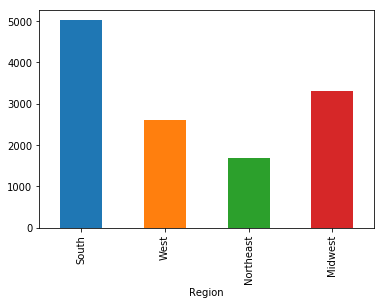

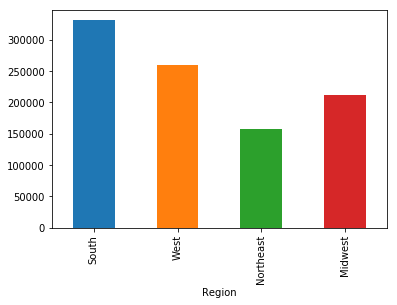

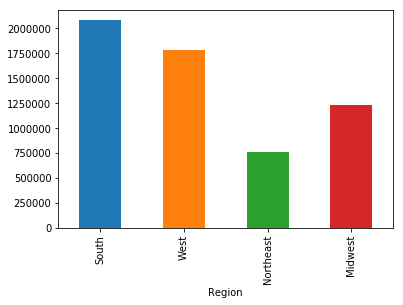

In [80]:
import json
import pandas as pd

file = open('FBI_CrimeData_2016.json')
crime_list_file = file.read()
crime_list = json.loads(crime_list_file)
      
murder_by_region = accum_crime('Region', 'Murder', crime_list)
violent_by_region = accum_violent_crime('Region', crime_list)
nonviolent_by_region = accum_nonviolent_crime('Region', crime_list)

print("Murders by Region")
print_dict(murder_by_region)
print("Violent Crimes by Region")
print_dict(violent_by_region)
print("Nonviolent Crimes by Region")
print_dict(nonviolent_by_region)

violent_by_state = accum_violent_crime('State', crime_list)
crime_sum = 0
for key in violent_by_state:
    crime_sum += violent_by_state[key]
    
mean = crime_sum/51
output_format = '{0:<20} {1:>7} {2:>19}'
print('National Average Violent Crime ', mean)
print(output_format.format('State','Crimes','Distance From Mean'))
for key in violent_by_state:
    print(output_format.format(key, violent_by_state[key], violent_by_state[key] - mean))

In [17]:
def accum_crime(key, crime, crime_list):
    data = {}
    for dictionary in crime_list:
        if not (dictionary[key] in data):
            data[dictionary[key]] = 0
            
        data[dictionary[key]] += int(dictionary[crime])
        
    return data

In [22]:
def accum_nonviolent_crime(key, crime_list):
    data = {}
    for dictionary in crime_list:
        if not (dictionary[key] in data):
            data[dictionary[key]] = 0
            
        data[dictionary[key]] += int(dictionary['Burglary']) + int(dictionary['Theft']) + int(dictionary['Vehicle_Theft'])
        
    return data

In [26]:
def accum_violent_crime(key, crime_list):
    data = {}
    for dictionary in crime_list:
        if not (dictionary[key] in data):
            data[dictionary[key]] = 0
            
        data[dictionary[key]] += int(dictionary['Assault']) + int(dictionary['Rape']) + int(dictionary['Robbery']) + int(dictionary['Murder'])
        
    return data

In [53]:
def print_dict(dictionary):
    amount = list(dictionary.values())
    region = list(dictionary.keys())
    pdDict = {"Region":pd.Series(region), "Incidents":pd.Series(amount)}
    df = pd.DataFrame(pdDict)
    print(df)
    df.plot.bar(x='Region',y = 'Incidents', legend=False)
    